In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
import os
import json

In [2]:
import FRIB_model as frib

FRIB_model version: 1.0.0. updated on 2024-03-05


In [3]:
fm = frib.flame_helper.ModelFlame('./flame_reconst_input.lat')

In [4]:
r0,s0 = fm.run(monitor='all')
r0 = fm.collect_data(r0,'pos','xrms','xprms')

# use names for from_elem and to_elem

In [5]:
r1,s1 = fm.run(monitor='all',to_element='BDS_BTS:QV_D5501')
r1 = fm.collect_data(r1,'pos','xrms','xprms')

In [6]:
s1.get_twiss('x')

array([-6.08975287,  9.32509489,  4.08415041])

In [7]:
r2,s2 = fm.run(bmstate=s1, monitor='all',from_element='BDS_BTS:QV_D5501')
r2 = fm.collect_data(r2,'pos','xrms','xprms')

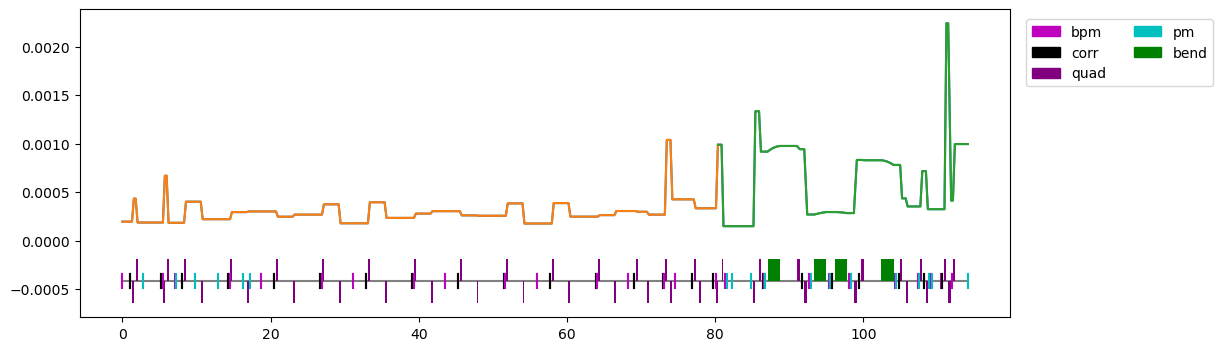

In [8]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(r0['pos'],r0['xprms'])
ax.plot(r1['pos'],r1['xprms'])
ax.plot(r2['pos'],r2['xprms'])
frib.flame_helper.plot_lattice(fm,ax)

# use index for from_elem-1 and to_elem

In [9]:
ielem = fm.get_index_by_name('BDS_BTS:QV_D5501')['BDS_BTS:QV_D5501'][0]

In [10]:
r1,s1 = fm.run(monitor='all',to_element=ielem-1)
r1 = fm.collect_data(r1,'pos','xrms','xprms')

In [11]:
s1.get_twiss('x')

array([-1.55960458,  7.41013604,  0.46319885])

In [12]:
r2,s2 = fm.run(bmstate=s1, monitor='all',from_element=ielem)
r2 = fm.collect_data(r2,'pos','xrms','xprms')

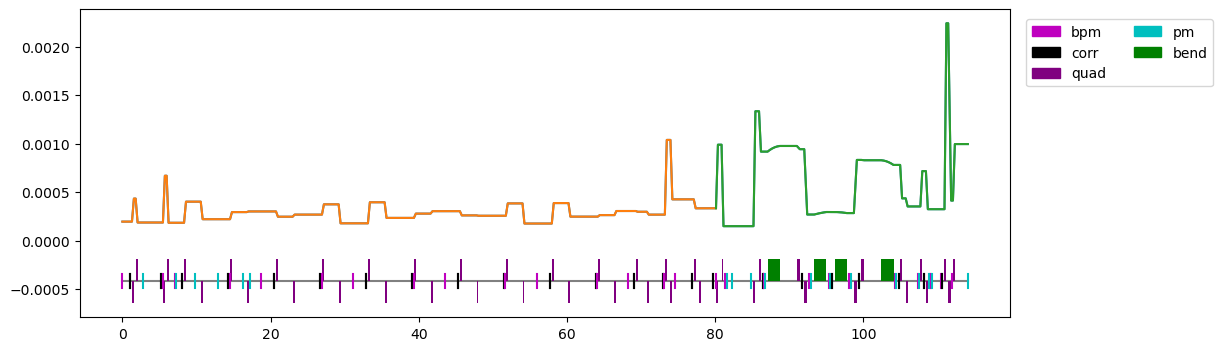

In [13]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(r0['pos'],r0['xprms'])
ax.plot(r1['pos'],r1['xprms'])
ax.plot(r2['pos'],r2['xprms'])
frib.flame_helper.plot_lattice(fm,ax)